In [5]:
#Momentos de Color en espacio de color HSV (canales H y V)
#en imágenes segmentadas de Citrus Aurantifolia
#Importar librerias necesarias
import cv2
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

In [6]:
#Leer imágen
image = cv2.imread("maduro.png")
#Convertir a espacio de color hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

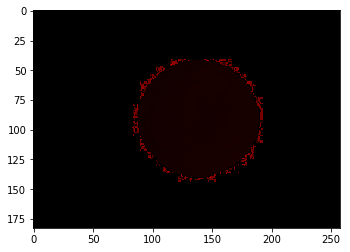

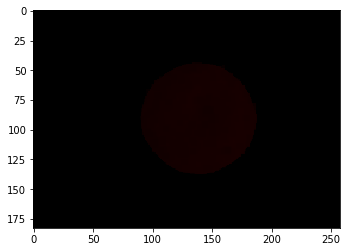

In [9]:
#Obtener canal H
hsv_h = hsv.copy()
hsv_h[:,:,1] = 0;
hsv_h[:,:,2] = 0;
plt.imshow(hsv_h)
plt.show()
kernel = np.ones((5,5), np.uint8)
#Aplicar operación de erosión
hsv_h = cv2.erode(hsv_h, kernel, iterations=1)
plt.imshow(hsv_h)
plt.show()
#Obtener canal V
hsv_v = hsv.copy()
hsv_v[:,:,0] = 0;
hsv_v[:,:,1] = 0;

In [11]:
#Obtener los canales como arreglos
#H
h_array = np.asarray(hsv_h)
#V
v_array = np.asarray(hsv_v)
#Crear mascara para omitir el uso de pixeles con valor 0
#H
h_filtered = np.ma.masked_where(h_array == 0, h_array)
#V
v_filtered = np.ma.masked_where(v_array == 0, v_array)

In [15]:
print(np.mean(h_filtered))
print(np.mean(v_filtered))

19.62355430183357
124.83040488922842


In [19]:
#Crear 3 funciones que retornen los 3 momentos de color de los componentes h y v de hsv
def getMedia(h, v):
    mh = np.mean(h)
    mv = np.mean(v)
    media = []
    media.append(mh)
    media.append(mv)
    return (np.array(media))


In [37]:
def getDevStd(h,v):
    stdh = np.std(h)
    stdv = np.std(v)
    stdl = []
    stdl.append(stdh)
    stdl.append(stdv)
    return np.array(stdl)


In [38]:
def getAsimetria(h,v):
    #Convertir las matrices de los canales en arrays 1-D
    #H
    h_filtered = np.array(h)
    h_filtered = h.ravel()
    #remover ceros "h"
    h_filtered = h_filtered[h_filtered != 0]
    #V
    v_filtered = np.array(v)
    v_filtered = v.ravel()
    #remover ceros "v"
    v_filtered = v_filtered[v_filtered != 0]
    #Computar asimetria/skewness
    h_skew = skew(h_filtered)
    v_skew = skew(v_filtered)
    skewness = []
    skewness.append(h_skew)
    skewness.append(v_skew)
    return np.array(skewness)

In [43]:
print(getMedia(h_filtered, v_filtered))
print(getDevStd(h_filtered, v_filtered))
print(getAsimetria(h_filtered, v_filtered))

[ 19.6235543  124.83040489]
[ 2.11896755 55.3420036 ]
[4.19768474 4.37640794]
